# Stock Price Prediction Using Machine Learning

## Getting Data and First Looking

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [30]:
!pip install yfinance

In [31]:
# Paketi import ediyoruz.
import yfinance as yf
 
# Hangi tarihler olduğunu seçiyoruz.
start_date = '2020-01-01'
end_date = '2022-10-6'
 
# Hangi verisini çekeceğimizi belirliyoruz.
ticker = 'GOOGL'
 
# Veriyi alıyoruz.
data = yf.download(ticker, start_date, end_date)

# Son 5 günün verisi :
print(data.tail())

[*********************100%***********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Date                                                                        
2022-09-29 00:00:00-04:00   98.639999   98.639999   95.959999   97.419998   
2022-09-30 00:00:00-04:00   97.050003   98.900002   95.559998   95.650002   
2022-10-03 00:00:00-04:00   96.760002   99.290001   96.519997   98.639999   
2022-10-04 00:00:00-04:00  100.440002  101.839996  100.379997  101.639999   
2022-10-05 00:00:00-04:00   99.830002  101.930000   98.800003  101.430000   

                            Adj Close    Volume  
Date                                             
2022-09-29 00:00:00-04:00   97.419998  31047200  
2022-09-30 00:00:00-04:00   95.650002  32910100  
2022-10-03 00:00:00-04:00   98.639999  27982000  
2022-10-04 00:00:00-04:00  101.639999  28850800  
2022-10-05 00:00:00-04:00  101.430000  22176900  


In [32]:
data.shape

(696, 6)

In [33]:
df = pd.DataFrame(data)

In [34]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00-05:00,67.420502,68.433998,67.324501,68.433998,68.433998,27278000
2020-01-03 00:00:00-05:00,67.400002,68.687500,67.365997,68.075996,68.075996,23408000
2020-01-06 00:00:00-05:00,67.581497,69.916000,67.550003,69.890503,69.890503,46768000
2020-01-07 00:00:00-05:00,70.023003,70.175003,69.578003,69.755501,69.755501,34330000
2020-01-08 00:00:00-05:00,69.740997,70.592499,69.631500,70.251999,70.251999,35314000
...,...,...,...,...,...,...
2022-09-29 00:00:00-04:00,98.639999,98.639999,95.959999,97.419998,97.419998,31047200
2022-09-30 00:00:00-04:00,97.050003,98.900002,95.559998,95.650002,95.650002,32910100
2022-10-03 00:00:00-04:00,96.760002,99.290001,96.519997,98.639999,98.639999,27982000


In [35]:
df.index

DatetimeIndex(['2020-01-02 00:00:00-05:00', '2020-01-03 00:00:00-05:00',
               '2020-01-06 00:00:00-05:00', '2020-01-07 00:00:00-05:00',
               '2020-01-08 00:00:00-05:00', '2020-01-09 00:00:00-05:00',
               '2020-01-10 00:00:00-05:00', '2020-01-13 00:00:00-05:00',
               '2020-01-14 00:00:00-05:00', '2020-01-15 00:00:00-05:00',
               ...
               '2022-09-22 00:00:00-04:00', '2022-09-23 00:00:00-04:00',
               '2022-09-26 00:00:00-04:00', '2022-09-27 00:00:00-04:00',
               '2022-09-28 00:00:00-04:00', '2022-09-29 00:00:00-04:00',
               '2022-09-30 00:00:00-04:00', '2022-10-03 00:00:00-04:00',
               '2022-10-04 00:00:00-04:00', '2022-10-05 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=696, freq=None)

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,696.0,1.050583e+02,2.748902e+01,5.281850e+01,7.634650e+01,1.084775e+02,1.307728e+02,1.512500e+02
High,696.0,1.062635e+02,2.760457e+01,5.334550e+01,7.776275e+01,1.107950e+02,1.321145e+02,1.515465e+02
Low,696.0,1.038388e+02,2.723866e+01,5.044350e+01,7.557225e+01,1.070300e+02,1.277844e+02,1.488990e+02
Close,696.0,1.050766e+02,2.739923e+01,5.270650e+01,7.628775e+01,1.089240e+02,1.298278e+02,1.498385e+02
Adj Close,696.0,1.050766e+02,2.739923e+01,5.270650e+01,7.628775e+01,1.089240e+02,1.298278e+02,1.498385e+02
Volume,696.0,3.534782e+07,1.568067e+07,9.312000e+06,2.513400e+07,3.155600e+07,4.038300e+07,1.232000e+08


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 696 entries, 2020-01-02 00:00:00-05:00 to 2022-10-05 00:00:00-04:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       696 non-null    float64
 1   High       696 non-null    float64
 2   Low        696 non-null    float64
 3   Close      696 non-null    float64
 4   Adj Close  696 non-null    float64
 5   Volume     696 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 38.1 KB


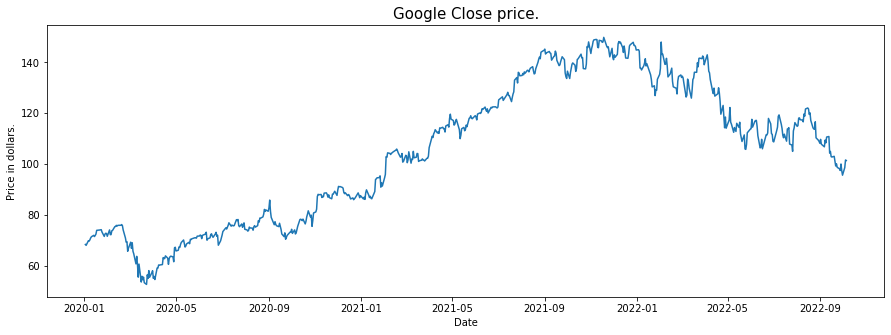

In [38]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Google Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.xlabel('Date')
plt.show()

## Data Manipulation

In [39]:
df = df.reset_index()

In [40]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02 00:00:00-05:00,67.420502,68.433998,67.324501,68.433998,68.433998,27278000
1,2020-01-03 00:00:00-05:00,67.400002,68.687500,67.365997,68.075996,68.075996,23408000
2,2020-01-06 00:00:00-05:00,67.581497,69.916000,67.550003,69.890503,69.890503,46768000
3,2020-01-07 00:00:00-05:00,70.023003,70.175003,69.578003,69.755501,69.755501,34330000
4,2020-01-08 00:00:00-05:00,69.740997,70.592499,69.631500,70.251999,70.251999,35314000
...,...,...,...,...,...,...,...
691,2022-09-29 00:00:00-04:00,98.639999,98.639999,95.959999,97.419998,97.419998,31047200
692,2022-09-30 00:00:00-04:00,97.050003,98.900002,95.559998,95.650002,95.650002,32910100
693,2022-10-03 00:00:00-04:00,96.760002,99.290001,96.519997,98.639999,98.639999,27982000
694,2022-10-04 00:00:00-04:00,100.440002,101.839996,100.379997,101.639999,101.639999,28850800


In [41]:
df.columns = df.columns.str.lower()

In [42]:
df

,date,open,high,low,close,adj close,volume
0,2020-01-02 00:00:00-05:00,67.420502,68.433998,67.324501,68.433998,68.433998,27278000
1,2020-01-03 00:00:00-05:00,67.400002,68.687500,67.365997,68.075996,68.075996,23408000
2,2020-01-06 00:00:00-05:00,67.581497,69.916000,67.550003,69.890503,69.890503,46768000
3,2020-01-07 00:00:00-05:00,70.023003,70.175003,69.578003,69.755501,69.755501,34330000
4,2020-01-08 00:00:00-05:00,69.740997,70.592499,69.631500,70.251999,70.251999,35314000
...,...,...,...,...,...,...,...
691,2022-09-29 00:00:00-04:00,98.639999,98.639999,95.959999,97.419998,97.419998,31047200
692,2022-09-30 00:00:00-04:00,97.050003,98.900002,95.559998,95.650002,95.650002,32910100
693,2022-10-03 00:00:00-04:00,96.760002,99.290001,96.519997,98.639999,98.639999,27982000
694,2022-10-04 00:00:00-04:00,100.440002,101.839996,100.379997,101.639999,101.639999,28850800


In [73]:
dfx = df.copy

In [78]:
df['date'] = df['date'].dt.strftime('%m/%d/%Y')

In [79]:
df

,date,open,high,low,close,volume
0,01/02/2020,67.420502,68.433998,67.324501,68.433998,27278000
1,01/03/2020,67.400002,68.687500,67.365997,68.075996,23408000
2,01/06/2020,67.581497,69.916000,67.550003,69.890503,46768000
3,01/07/2020,70.023003,70.175003,69.578003,69.755501,34330000
4,01/08/2020,69.740997,70.592499,69.631500,70.251999,35314000
...,...,...,...,...,...,...
691,09/29/2022,98.639999,98.639999,95.959999,97.419998,31047200
692,09/30/2022,97.050003,98.900002,95.559998,95.650002,32910100
693,10/03/2022,96.760002,99.290001,96.519997,98.639999,27982000
694,10/04/2022,100.440002,101.839996,100.379997,101.639999,28850800


## Close ve Adj Close her satır aynı mı kontrol et.

In [44]:
df[df['close'] == df['adj close']].shape

(696, 7)

In [46]:
df = df.drop(["adj close"], axis = 1)

In [47]:
df

,date,open,high,low,close,volume
0,2020-01-02 00:00:00-05:00,67.420502,68.433998,67.324501,68.433998,27278000
1,2020-01-03 00:00:00-05:00,67.400002,68.687500,67.365997,68.075996,23408000
2,2020-01-06 00:00:00-05:00,67.581497,69.916000,67.550003,69.890503,46768000
3,2020-01-07 00:00:00-05:00,70.023003,70.175003,69.578003,69.755501,34330000
4,2020-01-08 00:00:00-05:00,69.740997,70.592499,69.631500,70.251999,35314000
...,...,...,...,...,...,...
691,2022-09-29 00:00:00-04:00,98.639999,98.639999,95.959999,97.419998,31047200
692,2022-09-30 00:00:00-04:00,97.050003,98.900002,95.559998,95.650002,32910100
693,2022-10-03 00:00:00-04:00,96.760002,99.290001,96.519997,98.639999,27982000
694,2022-10-04 00:00:00-04:00,100.440002,101.839996,100.379997,101.639999,28850800


In [48]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

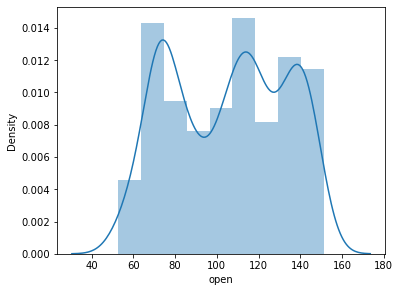

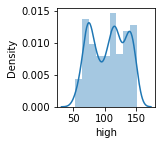

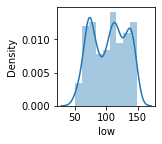

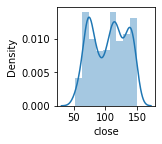

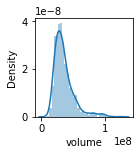

In [81]:
features = ['open', 'high', 'low', 'close', 'volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
    plt.show()


 Veriler 3 er kez tepe noktası oluşturmuş.

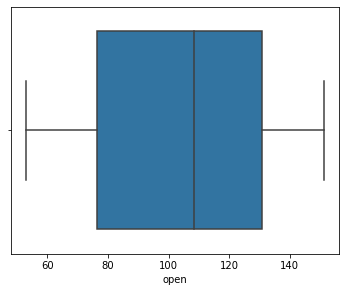

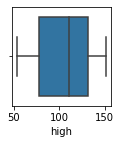

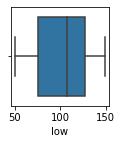

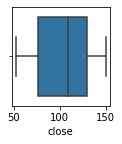

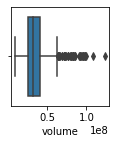

In [56]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
    plt.show()


Yalnızca hacim verileri aykırı değerler içeriyor.

## Feature Engineering

Bazı özelliklerin daha iyi anlaşılmasını sağlar ve modele anlama açısından da kolaylık sağlayarak performansını artırmasını sağlar.

In [84]:
splitted = df['date'].str.split('/', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()

,date,open,high,low,close,volume,day,month,year,is_quarter_end
0,01/02/2020,67.420502,68.433998,67.324501,68.433998,27278000,2,1,2020,0
1,01/03/2020,67.400002,68.687500,67.365997,68.075996,23408000,3,1,2020,0
2,01/06/2020,67.581497,69.916000,67.550003,69.890503,46768000,6,1,2020,0
3,01/07/2020,70.023003,70.175003,69.578003,69.755501,34330000,7,1,2020,0
4,01/08/2020,69.740997,70.592499,69.631500,70.251999,35314000,8,1,2020,0


In [96]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head(300)

,date,open,high,low,close,volume,day,month,year,is_quarter_end
0,01/02/2020,67.420502,68.433998,67.324501,68.433998,27278000,2,1,2020,0
1,01/03/2020,67.400002,68.687500,67.365997,68.075996,23408000,3,1,2020,0
2,01/06/2020,67.581497,69.916000,67.550003,69.890503,46768000,6,1,2020,0
3,01/07/2020,70.023003,70.175003,69.578003,69.755501,34330000,7,1,2020,0
4,01/08/2020,69.740997,70.592499,69.631500,70.251999,35314000,8,1,2020,0
...,...,...,...,...,...,...,...,...,...,...
295,03/05/2021,103.057503,105.309998,101.389000,104.853500,53100000,5,3,2021,1
296,03/08/2021,104.203003,105.686996,100.259499,100.375000,36868000,8,3,2021,1
297,03/09/2021,102.487503,103.195999,101.779999,102.017998,33920000,9,3,2021,1
298,03/10/2021,103.070000,103.070000,100.966499,101.809502,27100000,10,3,2021,1


Her şirket 3 aylık sonuçlarını yayınladığı için insanlar genelde şirket performansını böyle analiz eder.
Bu 3 aylık veriler borsa verilerini çok etkiler.
Bu özelliği eklememizin nedeni ise modelin için iyi bir parametre olacağıdır.

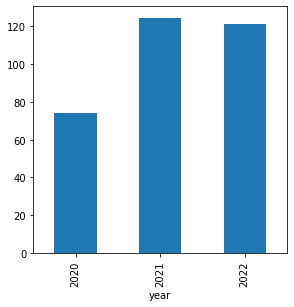

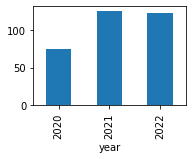

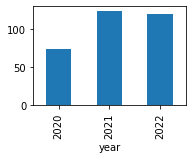

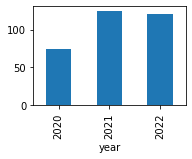

In [90]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(10,10))

for i, col in enumerate(['open', 'high', 'low', 'close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
    plt.show()

Bu grafiklere göre fiyatların 2020 yılından 2021 e neredeyse iki kat arttığını görebiliriz.

In [91]:
df.groupby('is_quarter_end').mean()

,open,high,low,close,volume,day,month,year
is_quarter_end,,,,,,,,
0,105.005711,106.234416,103.831439,105.070197,3.540937e+07,15.633772,5.717105,2020.912281
1,105.158261,106.318625,103.852900,105.088865,3.523087e+07,15.758333,7.037500,2020.908333


Buradan çok anlamlı sonuçlar gelmedi.

In [98]:
df['open-close'] = df['open'] - df['close']
df['low-high'] = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)

Shift close satırını bir satır aşağı kaydırır.

In [100]:
df['open-close']

0     -1.013496
1     -0.675995
2     -2.309006
3      0.267502
4     -0.511002
         ...   
691    1.220001
692    1.400002
693   -1.879997
694   -1.199997
695   -1.599998
Name: open-close, Length: 696, dtype: float64

Şimdi satın alıp almama durumunu belirleyecek target değişkenini ekliyoruz ve modele sokmaya hazır hale getiriyoruz.

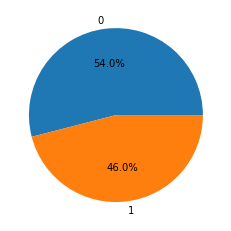

In [99]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

Eklediğimiz özelliğin ne kadar anlamlı olduğuna bakıyoruz.

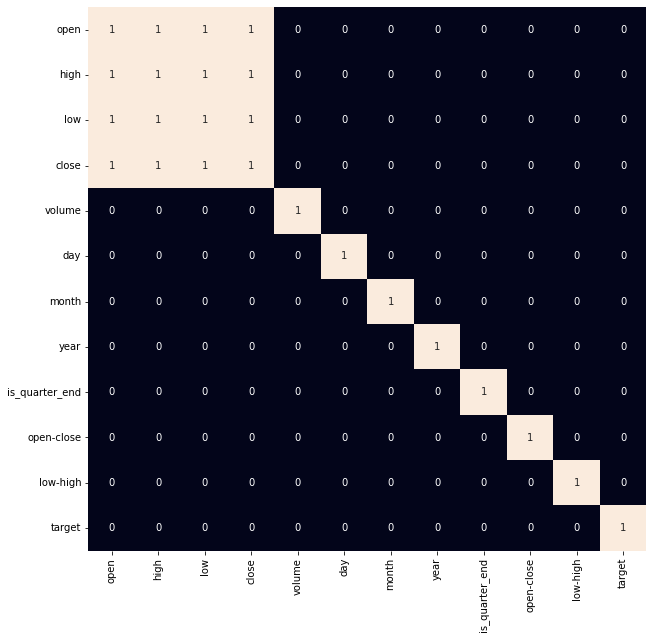

In [101]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

Son olarak ısı haritasına bakarak sadece ilk değişkenlerin birbiri ile korelasyonu yüksek olup daha sonra eklenen özelliklerin korelasyonu olmadığından verimizin modele hazır hale geldiğini anlıyoruz.

## Train-Test Ayırma ve Normalizasyon

In [103]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(626, 3) (70, 3)


Seçilen özelliklerimizi standart scaler fonksiyonu ile normalize ediyoruz. Daha sonra %90 Train %10 Test olarak verimizi ayırıyoruz.

## Model Geliştirme ve Tahmin

Lojistik Regresyon, Karar Destek Makineleri ve XGBSınıflandırma model yöntemlerini kullanacağız.
Değerlendirme metriği olarak ROC-AUC eğrisi kullanacağız. Bunun nedeni 0 veya 1 demek yerine 0 ile 1 arasındaki sürekli değerleri tahmin ettirmektir.
Genelikle tahminlerin doğruluğunu ölçmek için kullanılır.

ROC eğrisi sınıflandırma problemleri için çok önemli bir performans ölçümüdür. ROC bir olasılık eğrisidir ve altında kalan alan olan AUC ayrılabilirliğin derecesini veya ölçüsünü temsil eder.

In [105]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()

LogisticRegression() : 
Training Accuracy :  0.5471198251690582
Validation Accuracy :  0.5435855263157895

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.44235526966848093
Validation Accuracy :  0.41611842105263164

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) : 
Training Accuracy :  0.9975878278080159
Validation Accuracy :  0.6

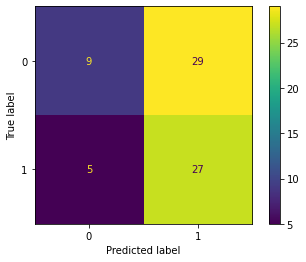

In [106]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()